In [1]:
from experiment import *

tf.config.set_visible_devices([], "GPU")

In [2]:
seed_sequence_length = 200 #649
seed_vocab_size = 3000 #6050
seed_hidden_units = 100 #172
seed_embeddings = 2 #4

Epoch 1/5


2022-06-30 19:20:47.578780: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


352/352 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.5160 - val_loss: 0.6575 - val_accuracy: 0.7564
Epoch 2/5
352/352 [==============================] - 0s 985us/step - loss: 0.5208 - accuracy: 0.7372 - val_loss: 0.3571 - val_accuracy: 0.8548
Epoch 3/5
352/352 [==============================] - 0s 982us/step - loss: 0.4384 - accuracy: 0.7803 - val_loss: 0.3381 - val_accuracy: 0.8608
Epoch 4/5
352/352 [==============================] - 0s 967us/step - loss: 0.4179 - accuracy: 0.7895 - val_loss: 0.3164 - val_accuracy: 0.8664
Epoch 5/5
352/352 [==============================] - 0s 978us/step - loss: 0.3991 - accuracy: 0.7958 - val_loss: 0.3060 - val_accuracy: 0.8764


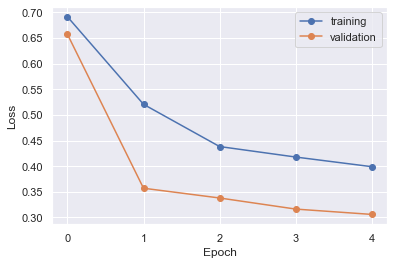

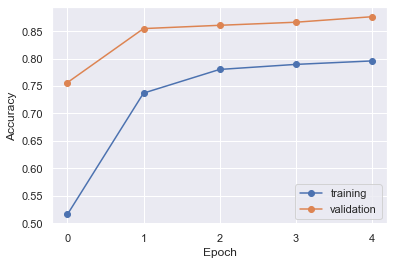

Final training accuracy: 0.7958
Final validation accuracy: 0.8764
Model parameter count: 12,651


(<keras.engine.sequential.Sequential at 0x288445880>,
 0.8763999938964844)

In [3]:
experiment(
    sequence_length=seed_sequence_length,
    vocab_size=seed_vocab_size,
    hidden_units=seed_hidden_units,
    embedding_dim=seed_embeddings,
    epochs=5,
    verbose=1,
)

In [4]:
def next_step(
    base_sequence_length, base_vocab_size, base_hidden_units, base_embeddings, rate
):
    results = {}
    for sequence_length in (base_sequence_length, round(base_sequence_length * rate)):
        for vocab_size in (base_vocab_size, round(base_vocab_size * rate)):
            for hidden_units in (base_hidden_units, round(base_hidden_units * rate)):
                for embeddings in (base_embeddings, 2 * base_embeddings):
                    _, _, accuracy = experiment(
                        sequence_length=sequence_length,
                        vocab_size=vocab_size,
                        hidden_units=hidden_units,
                        embedding_dim=embeddings,
                        verbose=0,
                    )
                    results[
                        (sequence_length, vocab_size, hidden_units, embeddings)
                    ] = accuracy

    max_value_key = max(results, key=results.get)
    max_value_accuracy = results[max_value_key]
    print(f"Maximum Accuracy from Step: {max_value_accuracy} with Key: {max_value_key}")
    return max_value_key

In [5]:
next_step(
    seed_sequence_length, seed_vocab_size, seed_hidden_units, seed_embeddings, 1.25
)

InvalidArgumentError: Graph execution error:

Detected at node 'Adam/Adam/update/mul_5' defined at (most recent call last):
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/2v/g4jygx0n1g986bctjf5_bp3m0000gn/T/ipykernel_53281/142508967.py", line 1, in <cell line: 1>
      next_step(
    File "/var/folders/2v/g4jygx0n1g986bctjf5_bp3m0000gn/T/ipykernel_53281/1170103550.py", line 9, in next_step
      _, _, accuracy = experiment(
    File "/Users/rerobbins/github/mids-w207/mids_w207_summer_22_Richard_Robbins/submissions/experiment.py", line 84, in experiment
      history = model.fit(
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 863, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py", line 532, in minimize
      return self.apply_gradients(grads_and_vars, name=name)
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py", line 671, in apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py", line 716, in _distributed_apply
      update_op = distribution.extended.update(
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py", line 694, in apply_grad_to_update_var
      return self._resource_apply_sparse_duplicate_indices(
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py", line 1280, in _resource_apply_sparse_duplicate_indices
      return self._resource_apply_sparse(summed_grad, handle, unique_indices,
    File "/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py", line 217, in _resource_apply_sparse
      var, coefficients['lr'] * m_t / (v_sqrt + coefficients['epsilon']),
Node: 'Adam/Adam/update/mul_5'
Incompatible shapes: [3000,2] vs. [0]
	 [[{{node Adam/Adam/update/mul_5}}]] [Op:__inference_train_function_84098]

In [ ]:
sequence_length = seed_sequence_length
vocab_size = seed_vocab_size
hidden_units = seed_hidden_units
embeddings = seed_embeddings

for _ in range(10):
    next_sequence_length, next_vocab_size, next_hidden_units, next_embeddings = next_step(sequence_length, vocab_size, hidden_units, embeddings, 1.25)

    if (
        next_sequence_length == sequence_length
        and next_vocab_size == vocab_size
        and next_hidden_units == hidden_units
        and next_embeddings == embeddings
    ):
        break

    sequence_length = next_sequence_length
    vocab_size = next_vocab_size
    hidden_units = next_hidden_units
    embeddings = next_embeddings